# transforms
Guorui Shen, guorui233@outlook.com, Jul 30, 2020.
+ `class torchvision.transforms.ToTensor`
    + Convert a PIL Image or numpy.ndarray to tensor. Converts a PIL Image or numpy.ndarray (H x W x C) in the range [0, 255] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0] if the PIL Image belongs to one of the modes (L, LA, P, I, F, RGB, YCbCr, RGBA, CMYK, 1) or if the numpy.ndarray has dtype = np.uint8
+ `class torchvision.transforms.Normalize(mean, std, inplace=False)`
    + Normalize a tensor image with mean and standard deviation. Given mean: (mean[1],...,mean[n]) and std: (std[1],..,std[n]) for n channels, this transform will normalize each channel of the input torch.*Tensor i.e., output[channel] = (input[channel] - mean[channel]) / std[channel]
+ `class torchvision.transforms.CenterCrop(size)`
    + Crops the given image at the center. The image can be a PIL Image or a torch Tensor, in which case it is expected to have […, H, W] shape, where … means an arbitrary number of leading dimensions
    + size (sequence or int) – Desired output size of the crop. If size is an int instead of sequence like (h, w), a square crop (size, size) is made. If provided a tuple or list of length 1, it will be interpreted as (size[0], size[0]).
+ `torchvision.transforms.functional.center_crop(img: torch.Tensor, output_size: List[int])`
    + Crops the given image at the center. The image can be a PIL Image or a Tensor, in which case it is expected to have […, H, W] shape, where … means an arbitrary number of leading dimensions.
+ `transforms.Resize(256)`
    + input image is resized to be of size (256, 256)
+ `transforms.RandomResizedCrop(224)`
    + This will extract a patch of size (224, 224) from your input image randomly. So, it might pick this path from topleft, bottomright or anywhere in between. So, you are doing data augmentation in this part.
+ `class torchvision.transforms.RandomCrop(size, padding=None, pad_if_needed=False, fill=0, padding_mode='constant')`
    + Crop the given image at a random location. The image can be a PIL Image or a Tensor, in which case it is expected to have […, H, W] shape, where … means an arbitrary number of leading dimensions.
+ `class torchvision.transforms.RandomHorizontalFlip(p=0.5)`
    + Horizontally flip the given image randomly with a given probability. The image can be a PIL Image or a torch Tensor, in which case it is expected to have […, H, W] shape, where … means an arbitrary number of leading dimensions.
    + p (float) – probability of the image being flipped. Default value is 0.5

In [1]:
from torchvision import datasets, transforms
import torch

### `class torchvision.transforms.ToTensor` and `class torchvision.transforms.Normalize(mean, std, inplace=False)`

In [2]:
transform=transforms.Compose([
    transforms.ToTensor(), # From int in the interval (0, 255) to float in [0, 1].
    transforms.Normalize((0.1307,), (0.3081,)) # (x-mean)/variance. Images in mnist are allsingle channel.
    ])
dataset1 = datasets.MNIST('data', train=True, download=False,
                   transform=transform)
dataset2 = datasets.MNIST('data', train=False,
                   transform=transform)

In [3]:
kwargs = {'batch_size': 8}
train_loader = torch.utils.data.DataLoader(dataset1,**kwargs)
test_loader = torch.utils.data.DataLoader(dataset2, **kwargs)
print("len(train_loader.dataset)=", len(train_loader.dataset), ", len(test_loader.dataset)=", len(test_loader.dataset))

len(train_loader.dataset)= 60000 , len(test_loader.dataset)= 10000


In [4]:
print(train_loader.dataset.data.shape)
print(train_loader.dataset.data.type)
print(train_loader.dataset.targets.shape)
print(train_loader.dataset.targets.type)

torch.Size([60000, 28, 28])
<built-in method type of Tensor object at 0x000001F159730080>
torch.Size([60000])
<built-in method type of Tensor object at 0x000001F15972FAC0>


In [5]:
print(train_loader.dataset.train_data.shape)
print(train_loader.dataset.train_data.type)

torch.Size([60000, 28, 28])
<built-in method type of Tensor object at 0x000001F159730080>


D:\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


In [6]:
print(train_loader.dataset)
# print(train_loader.dataset[0])
# print(train_loader.dataset[0][0])
print(train_loader.dataset[0][0][0][0])
print(train_loader.dataset[0][0][0][27])

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )
tensor([-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
        -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
        -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
        -0.4242, -0.4242, -0.4242, -0.4242])
tensor([-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
        -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
        -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
        -0.4242, -0.4242, -0.4242, -0.4242])


In [7]:
dataiter = iter(train_loader)
im = dataiter.next()
print(im[0].shape)
print(im[1])
print(len(im[1]))

torch.Size([8, 1, 28, 28])
tensor([5, 0, 4, 1, 9, 2, 1, 3])
8


### `class torchvision.transforms.CenterCrop(size)`

In [8]:
# im_cropped = transforms.functional.center_crop(img=im[0], output_size=3)

In [9]:
CenterCrop_size = 20
transform=transforms.Compose([
#     transforms.CenterCrop(size=CenterCrop_size), # This line should be placed before `transforms.ToTensor()`.
    transforms.RandomCrop(size=CenterCrop_size, padding=None, pad_if_needed=False, fill=0, padding_mode='constant'),
#     transforms.Resize(CenterCrop_size),
#     transforms.RandomHorizontalFlip(p=0.3),
    transforms.ToTensor(), # From int in the interval (0, 255) to float in [0, 1].
    ])
dataset1_cropped = datasets.MNIST('data', train=True, download=False, transform=transform)
train_loader_cropped = torch.utils.data.DataLoader(dataset1_cropped,**kwargs)

In [10]:
# dataset1_cropped = datasets.ImageFolder(root='./ssim-AE-20200727/train-original-10imgs', transform=transform)
# train_loader_cropped = torch.utils.data.DataLoader(dataset=dataset1_cropped, batch_size=4, shuffle=True, num_workers=2)

In [11]:
import matplotlib.pyplot as plt
import numpy as np
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    npimg_final = np.transpose(npimg, (1, 2, 0))
    print(npimg_final.shape)
    plt.imshow(npimg_final)
    plt.show()
    
def imshow_mnist(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    print(npimg.shape)
    npimg_final = npimg.reshape((CenterCrop_size, CenterCrop_size))
    print(npimg_final.shape)
    plt.imshow(npimg_final, cmap='Greys') # For single channel images
    plt.show()

## Both `enumerate` and `iter` can be used to display DataLoader
### method 1- enumerate
+ use this one if there is a few images to display.

In [12]:
# for i, data in enumerate(train_loader_cropped):
#     inputs, labels = data
#     print("i={}, inputs.shape={}, labels.shape={}".format(i, inputs.shape, labels.shape))
#     imshow(inputs[0])

### method 2- iter
+ use this one if there are many images to display, such as minist dataset, so that you don't have a lot of redundant images to see.

torch.Size([8, 1, 20, 20])
(1, 20, 20)
(20, 20)


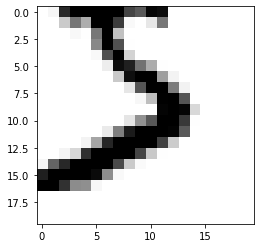

In [13]:
dataiter = iter(train_loader_cropped)
im = dataiter.next()
print(im[0].shape)
imshow_mnist(im[0][0])

In [14]:
print(labels.shape)

NameError: name 'labels' is not defined